## MSDM5058 -- Entropy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

### Shannon Information Entropy:

In [2]:
# Bernoulli trial with different p. The outcome of a fair coin is the most uncertain:

entropy([1/2, 1/2], base=2)

1.0

In [3]:
# The outcome of a biased coin is less uncertain:

entropy([9/10, 1/10], base=2)

0.46899559358928117

### Relative Entropy:

In [4]:
# Relative entropy between the fair and the biased coins above

entropy([1/2, 1/2], qk=[9/10, 1/10])

0.5108256237659907

In [5]:
# Relative entropy of the simple example in Lecture 10

entropy([0.36, 0.48, 0.16], qk=[1/3, 1/3, 1/3])

0.0852996013183706

In [6]:
# Relative entropy of the simple example in Lecture 10, but now we interchange p(x) and q(x)

entropy([1/3, 1/3, 1/3], qk=[0.36, 0.48, 0.16])

0.09745500678538754

### Renyi Entropy:

In [7]:
X1 = [0.25, 0.5, 0.25]
X2 = [0.1, 0.25, 0.3, 0.45]
X3 = [0, 0.5, 0.5]

X4 = np.full(100, 1/100)
X5 = np.full(1000, 1/1000)

X6 = np.arange(100, dtype=float)
X6 /= np.sum(X6)

In [8]:
np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [9]:
def renyi_entropy(alpha, X):
    assert alpha >= 0, "Error: renyi_entropy only accepts values of alpha >= 0, but alpha = {}.".format(alpha)  # DEBUG
    if np.isinf(alpha):
        # XXX Min entropy!
        return - np.log2(np.max(X))
    elif np.isclose(alpha, 0):
        # XXX Max entropy!
        return np.log2(len(X))
    elif np.isclose(alpha, 1):
        # XXX Shannon entropy!
        return - np.sum(x_log2_x(X))
    else:
        return (1.0 / (1.0 - alpha)) * np.log2(np.sum(X ** alpha))

In [10]:
# Curryfied version
def renyi_entropy_2(alpha):
    def re(X):
        return renyi_entropy(alpha, X)
    return re

In [11]:
# Curryfied version
def renyi_entropy_3(alphas, X):
    res = np.zeros_like(alphas)
    for i, alpha in enumerate(alphas):
        res[i] = renyi_entropy(alpha, X)
    return res

In [12]:
alphas = np.linspace(0, 10, 1000)

In [13]:
renyi_entropy_3(alphas, X1)[:10]

array([1.5849625 , 1.58414417, 1.58332491, 1.58250473, 1.58168363,
       1.58086162, 1.58003871, 1.5792149 , 1.57839021, 1.57756464])

In [14]:
def plot_renyi_entropy(alphas, X):
    fig = plt.figure()
    plt.plot(alphas, renyi_entropy_3(alphas, X))
    plt.xlabel(r"Value for $\alpha$")
    plt.ylabel(r"Value for $H_{\alpha}(X)$")
    plt.title(r"Réniy entropy for $X={}$".format(X[:10]))
    plt.show()
    # return fig

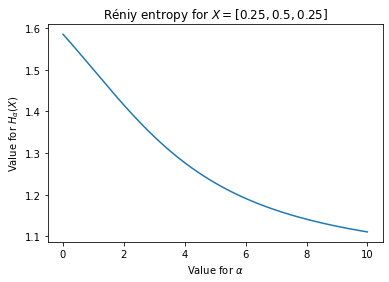

In [15]:
plot_renyi_entropy(alphas, X1)

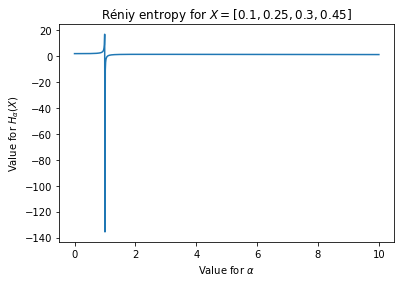

In [16]:
plot_renyi_entropy(alphas, X2)

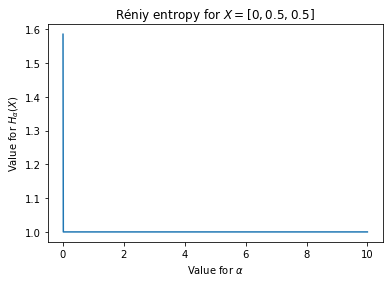

In [17]:
plot_renyi_entropy(alphas, X3)

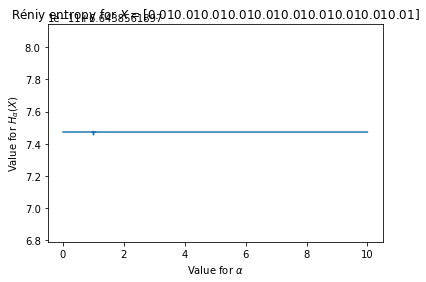

In [18]:
plot_renyi_entropy(alphas, X4)

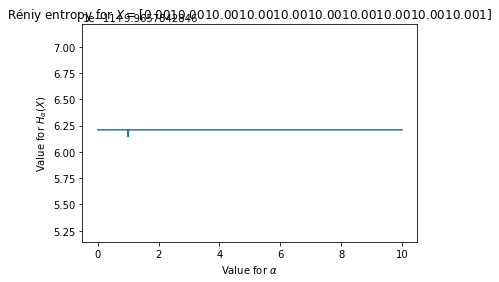

In [19]:
plot_renyi_entropy(alphas, X5)

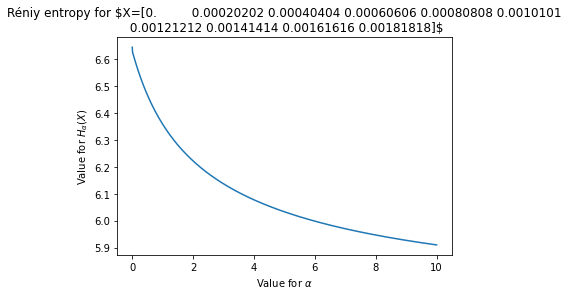

In [20]:
plot_renyi_entropy(alphas, X6)